In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 目标函数
def real_func(x):
    return np.cos(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.08099479]


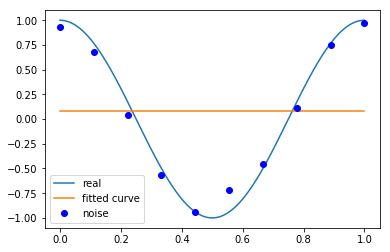

In [4]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [0.09572483 0.03313242]


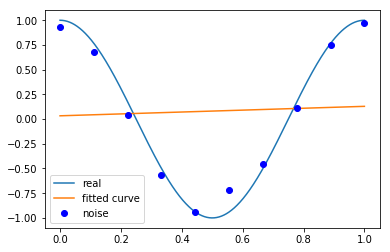

In [5]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [-1.02149314  8.83111012 -7.78451374  1.1497573 ]


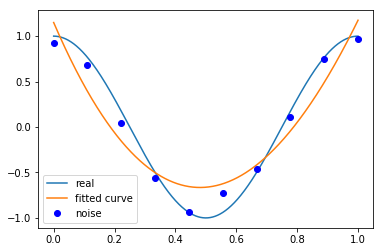

In [6]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [ 2.18781619e+04 -9.82032103e+04  1.84721084e+05 -1.88983799e+05
  1.14148476e+05 -4.13408668e+04  8.71896576e+03 -9.79975647e+02
  4.12103833e+01  9.27008991e-01]


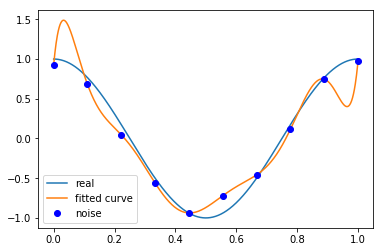

In [7]:

# M=9
p_lsq_9 = fitting(M=9)

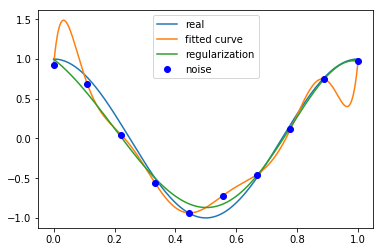

In [8]:
regularization = 0.0001
def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))


plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()